Exploring the raw data
In this chapter, you'll be introduced to the problem you'll be solving in this course. How do you accurately classify line-items in a school budget based on what that money is being used for? You will explore the raw text and numeric values in the dataset, both quantitatively and visually. And you'll learn how to measure success when trying to predict class labels for each row of the dataset.

# 1. Introducing the challenge
### 1.1 What category of problem is this?
You're no novice to data science, but let's make sure we agree on the basics.

As Peter from [DrivenData](https://www.drivendata.org/) explained in the video, you're going to be working with school district budget data. This data can be classified in many ways according to certain labels, e.g. `Function: Career & Academic Counseling`, or `Position_Type: Librarian`.

Your goal is to develop a model that predicts the probability for each possible label by relying on some correctly labeled examples.

What type of machine learning problem is this?

Possible Answers:
1. Reinforcement Learning, because the model is learning from the data through a system of rewards and punishments.
2. Unsupervised Learning, because the model doesn't output labels with certainty.
3. Unsupervised Learning, because not all data is correctly classified to begin with.
4. Supervised Learning, because the model will be trained using labeled examples.

<div align=right><b>Answer:</b> Using correctly labeled budget line items to train</div>
<div align=right>means this is a supervised learning problem. (4)</div>

### 1.2 What is the goal of the algorithm?
As you know from previous courses, there are different types of supervised machine learning problems. In this exercise you will tell us what type of supervised machine learning problem this is, and why you think so.

Remember, your goal is to correctly label budget line items by training a supervised model to predict the probability of each possible label, taking most probable label as the correct label.

Possible Answers:
1. Regression, because the model will output probabilities.
2. Classification, because predicted probabilities will be used to select a label class.
3. Regression, because probabilities take a continuous value between 0 and 1.
4. Classification, because the model will output probabilities.

<div align=right><b>Answer:</b> Specifically, we have ourselves a multi-class-multi-label classification problem (quite a mouthful!), </div>
<div align=right>because there are 9 broad categories that each take on many possible sub-label instances. (2)</div>

# 2. Exploring the data
### 2.1 Loading the data
Now it's time to check out the dataset! You'll use pandas (which has been pre-imported as pd) to load your data into a DataFrame and then do some Exploratory Data Analysis (EDA) of it.

The training data is available as `TrainingData.csv`. Your first task is to load it into a DataFrame in the IPython Shell using `pd.read_csv()` along with the keyword argument `index_col=0`.

Use methods such as `.info()`, `.head()`, and `.tail()` to explore the budget data and the properties of the features and labels.

Some of the column names correspond to __features__ - descriptions of the budget items - such as the `Job_Title_Description` column. The values in this column tell us if a budget item is for a teacher, custodian, or other employee.

Some columns correspond to the budget item __labels__ you will be trying to predict with your model. For example, the `Object_Type` column describes whether the budget item is related classroom supplies, salary, travel expenses, etc.

Use `df.info()` in the IPython Shell to answer the following questions:
* How many rows are there in the training data?
* How many columns are there in the training data?
* How many non-null entries are in the Job_Title_Description column?

In [1]:
# Import pandas
import pandas as pd
# Load file into DataFrame: df
df = pd.read_csv('_datasets/TrainingSetSample.csv', index_col=0)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 198 to 101861
Data columns (total 25 columns):
Function                  1560 non-null object
Use                       1560 non-null object
Sharing                   1560 non-null object
Reporting                 1560 non-null object
Student_Type              1560 non-null object
Position_Type             1560 non-null object
Object_Type               1560 non-null object
Pre_K                     1560 non-null object
Operating_Status          1560 non-null object
Object_Description        1461 non-null object
Text_2                    382 non-null object
SubFund_Description       1183 non-null object
Job_Title_Description     1131 non-null object
Text_3                    296 non-null object
Text_4                    193 non-null object
Sub_Object_Description    364 non-null object
Location_Description      874 non-null object
FTE                       449 non-null float64
Function_Description      1340 non-null object
F

### Possible Answers:
1. 26 rows, 1560 columns, 1560 non-null entries in Job_Title_Description.
2. 26 rows, 1560 columns, 1131 non-null entries in Job_Title_Description.
3. 1560 rows, 26 columns, 1131 non-null entries in Job_Title_Description.
4. 1560 rows, 26 columns, 1560 non-null entries in Job_Title_Description.
<div align=right><b>Answer:</b> (3)</div>

### 2.2 Summarizing the data
You'll continue your EDA in this exercise by computing summary statistics for the numeric data in the dataset. The data has been pre-loaded into a DataFrame called `df`.

You can use `df.info()` above to determine which columns of the data are numeric, specifically type `float64`. You'll notice that there are two numeric columns, called `FTE` and `Total`.

* `FTE`: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
* `Total`: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.

After printing summary statistics for the numeric data, your job is to plot a histogram of the non-null `FTE` column to see the distribution of part-time and full-time employees in the dataset.

_This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the [Scikit-Learn Cheat Sheet](../Scikit-Learn_Cheat_Sheet.pdf) and keep it handy!_

### Instructions:
* Print summary statistics of the numeric columns in the DataFrame `df` using the `.describe()` method.
* Import `matplotlib.pyplot` as `plt`.
* Create a histogram of the non-null `'FTE'` column. You can do this by passing `df['FTE'].dropna()` to `plt.hist()`.
* The title has been specified and axes have been labeled.

In [3]:
# Print the summary statistics
df.describe()

,FTE,Total
count,449.000000,1.542000e+03
mean,0.493532,1.446867e+04
std,0.452844,7.916752e+04
min,-0.002369,-1.044084e+06
25%,0.004310,1.108111e+02
50%,0.440000,7.060299e+02
75%,1.000000,5.347760e+03
max,1.047222,1.367500e+06


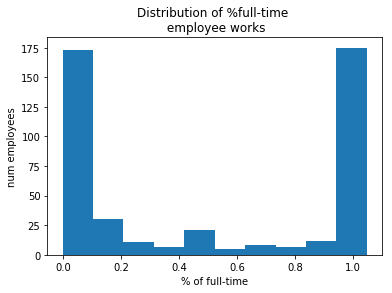

In [4]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the FTE column is bimodal. That is, there are some part-time and some full-time employees.

# 3. Looking at the datatypes
### 3.1 Exploring datatypes in pandas
It's always good to know what datatypes you're working with, especially when the inefficient pandas type `object` may be involved. Towards that end, let's explore what we have.

The data has been loaded into the workspace as `df`. Your job is to look at the DataFrame attribute `.dtypes` in the IPython Shell, and call its `.value_counts()` method in order to answer the question below.

Make sure to call `df.dtypes.value_counts()`, and not `df.value_counts()`! Check out the difference in the Shell. `df.value_counts()` will return an error, because it is a _Series_ method, not a _DataFrame_ method.

How many columns with dtype `object` are in the data?

### Possible Answers:
1. 2.
2. 23.
3. 64.
4. 25.

In [5]:
df.dtypes.value_counts()

object     23
float64     2
dtype: int64

<div align=right><b>Answer:</b> (2)</div>

### 3.2 Encode the labels as categorical variables
Remember, your ultimate goal is to predict the probability that a certain label is attached to a budget line item. You just saw that many columns in your data are the inefficient `object` type. Does this include the labels you're trying to predict? Let's find out!

There are 9 columns of labels in the dataset. Each of these columns is a category that has [many possible values it can take](https://www.drivendata.org/competitions/4/box-plots-for-education/page/15/#labels_list). The 9 labels have been loaded into a list called `LABELS`. In the Shell, check out the type for these labels using `df[LABELS].dtypes`.

You will notice that every label is encoded as an object datatype. Because `category` datatypes are [much more efficient](https://www.continuum.io/content/pandas-categoricals) your task is to convert the labels to category types using the `.astype()` method.

Note: `.astype()` only works on a pandas Series. Since you are working with a pandas DataFrame, you'll need to use the `.apply()` method and provide a `lambda` function called `categorize_label` that applies `.astype()` to each column, `x`.

### Instructions:
* Define the lambda function `categorize_label` to convert column `x` into `x.astype('category')`.
* Use the `LABELS` list provided to convert the subset of data `df[LABELS]` to categorical types using the `.apply()` method and `categorize_label`. Don't forget `axis=0`.
* Print the converted `.dtypes` attribute of `df[LABELS]`.

In [6]:
# Load labels corresponding to object types
LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 
          'Position_Type', 'Object_Type',  'Pre_K', 'Operating_Status']

In [7]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
df[LABELS].dtypes

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object

### 3.3 Counting unique labels
As Peter mentioned in the video, there are over 100 unique labels. In this exercise, you will explore this fact by counting and plotting the number of unique values for each category of label.

The dataframe `df` and the `LABELS` list have been loaded into the workspace; the `LABELS` columns of `df` have been converted to category types.

pandas, which has been pre-imported as `pd`, provides a `pd.Series.nunique` method for counting the number of unique values in a Series.

### Instructions:
* Create the DataFrame `num_unique_labels` by using the `.apply()` method on `df[LABELS]` with `pd.Series.nunique` as the argument.
* Create a bar plot of `num_unique_labels` using pandas' `.plot(kind='bar')` method.
* The axes have been labeled

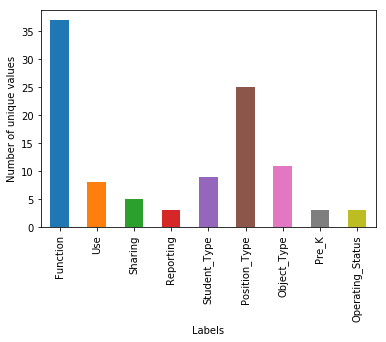

In [8]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

That's a lot of labels to work with. How will you measure success with these many labels?

# 4. How do we measure success?
### 4.1 Penalizing highly confident wrong answers
<p>As Peter explained in the video, log loss provides a steep penalty for predictions that are both wrong and confident, i.e., a high probability is assigned to the incorrect class.</p>
<p>Suppose you have the following 3 examples:</p>
<p>$$A: y=1, p=0.85 $$</p>
<p>$$B: y=0, p=0.99 $$</p>
<p>$$C: y=0, p=0.51 $$</p>
<p>Select the ordering of the examples which corresponds to the lowest to highest log loss scores. <code>y</code> is an indicator of whether the example was classified correctly. You shouldn't need to crunch any numbers!</p>

### Possible Answers
1. Lowest: A, Middle: B, Highest: C.
2. Lowest: C, Middle: A, Highest: B.
3. Lowest: A, Middle: C, Highest: B.
4. Lowest: B, Middle: A, Highest: C.

<div align=right><b>Answer:</b> Of the two incorrect predictions, <code>B</code> will have</div>
<div align=right>a higher log loss because it is confident <i>and</i> wrong. (3)</div>

### 4.2 Computing log loss with NumPy
To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function `compute_log_loss()`, which Peter showed you in the video.

5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: `actual_labels`, `correct_confident`, `correct_not_confident`, `wrong_not_confident`, and `wrong_confident`.

Your job is to compute the log loss for each sample set provided using the `compute_log_loss(predicted_values, actual_values)`. It takes the predicted values as the first argument and the actual values as the second argument.

### Instructions:
* Using the `compute_log_loss()` function, compute the log loss for the following predicted values (in each case, the actual values are contained in `actual_labels`):
    * `correct_confident`.
    * `correct_not_confident`.
    * `wrong_not_confident`.
    * `wrong_confident`.
    * `actual_labels`.

In [9]:
# Import numpy
import numpy as np

# Define LogLoss function, account for clipping
def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between `predicted` and `actual` when these are 1D arrays.
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    
    return -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))

# Create sample data
actual_labels = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=np.float64)

correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])
correct_not_confident = np.array([0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35])
wrong_not_confident = np.array([0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65])
wrong_confident = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95])

In [10]:
# Compute and print log loss for 1st case
correct_confident = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident)) 

# Compute log loss for 2nd case
correct_not_confident = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident)) 

# Compute and print log loss for 3rd case
wrong_not_confident = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident)) 

# Compute and print log loss for 4th case
wrong_confident = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident)) 

# Compute and print log loss for actual labels
actual_labels = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels)) 

Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


Log loss penalizes highly confident wrong answers much more than any other type. This will be a good metric to use on your models. 